In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [14]:
correlation_df = pd.read_csv('correlation_data')
correlation_df.set_index('Unnamed: 0', inplace=True)

In [3]:
bank_sectorial_index = pd.read_csv('nifty_list/niftybanklist.csv')['Symbol']

In [4]:
holdings_df = pd.read_csv('holdings.csv')

In [5]:
zerodha_holdings_ticker = holdings_df['Instrument']

In [6]:
zerodha_holdings_ticker_not_200 = ['SPENCERS', 'PVR', 'TRENT', 'BALRAMCHIN', 'RELAXO', 'INDIACEM', 'SBICARD', 'YESBANK', 'IRCTC', 'AVANTIFEED', 'SPICEJET']
zerodha_holdings_ticker_200 = list(set(zerodha_holdings_ticker) - set(zerodha_holdings_ticker_not_200))


In [7]:
nifty_closes_df = pd.read_csv('nifty200_joined_closes.csv')

In [8]:
nifty_closes_df = nifty_closes_df[zerodha_holdings_ticker_200]

In [15]:
correlation_df.head(1).to_dict('records')

[{'AUBANK': 1.0,
  'ADANIPORTS': 0.2907549278036627,
  'ADANIPOWER': 0.4860016806386072,
  'ADANITRANS': 0.7195902202936288,
  'ABCAPITAL': 0.4424710490836423,
  'ABFRL': 0.7497325952622317,
  'AJANTPHARM': 0.022358472770365758,
  'ALKEM': 0.2793662393188441,
  'AMARAJABAT': 0.4271362522038321,
  'AMBUJACEM': 0.22467506127347067,
  'APOLLOHOSP': 0.7821397178843216,
  'APOLLOTYRE': 0.10501532521299403,
  'ASHOKLEY': 0.3555632771398153,
  'ASIANPAINT': 0.5273687850431185,
  'AUROPHARMA': -0.4782523731261215,
  'DMART': 0.5584461615940298,
  'AXISBANK': 0.4812581876020885,
  'BAJAJ-AUTO': 0.4692892047731196,
  'BAJFINANCE': 0.8614880065382645,
  'BAJAJFINSV': 0.8138748721860503,
  'BAJAJHLDNG': 0.5892141025396093,
  'BALKRISIND': 0.4565547350463426,
  'BANDHANBNK': 0.2967192479062276,
  'BANKBARODA': 0.1442258674575419,
  'BANKINDIA': 0.03232548539062007,
  'BATAINDIA': 0.6810823664681711,
  'BERGEPAINT': 0.5042529876214028,
  'BEL': 0.2385565234116171,
  'BHARATFORG': 0.4557807756516188,

In [9]:
nifty_closes_df_corr = nifty_closes_df.corr()

In [10]:
def visualize_correlation(df_corr):
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    heatmap = ax.pcolor(data, cmap='Spectral')
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

    ax.invert_yaxis()
    ax.xaxis.tick_top()

    column_labels = df_corr.columns
    row_labels = df_corr.index

    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()

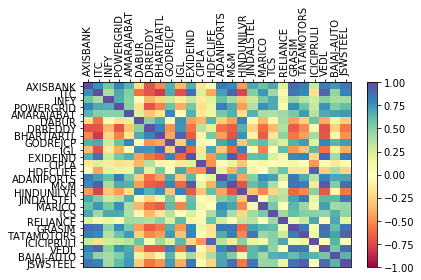

In [11]:
visualize_correlation(nifty_closes_df_corr[])

In [12]:
import seaborn as sns

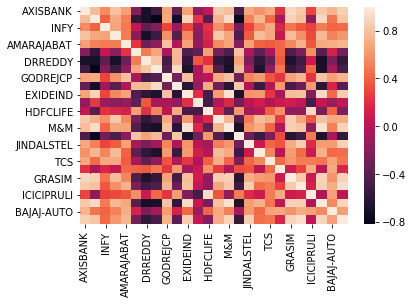

In [13]:
sns.heatmap(nifty_closes_df_corr)

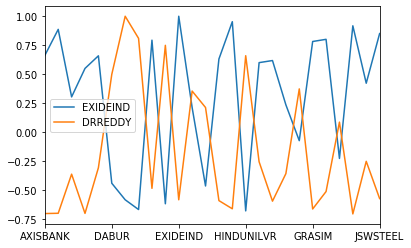

In [17]:
nifty_closes_df_corr[['EXIDEIND', 'DRREDDY']].plot()

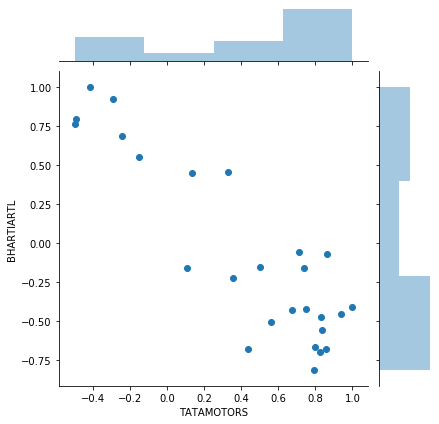

In [68]:
sns.jointplot(x='TATAMOTORS',y='BHARTIARTL',data=nifty_closes_df_corr,kind='scatter')